<a href="https://colab.research.google.com/github/kerul31/Google_Colab_Modules/blob/Interactive_modules/Copy_of_Cars_dataset_example_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory analysis and regression analysis for the cars dataset

##Instructions for running the module on Google Colab:

### First click on "Connect" button on the right-hand side of the window toolbar.

###Once connected, click on the menu "Runtime --> Run all", or Ctrl+F9 using your keyboard.

###Note that you will be prompted to provide SASOnDemand academics account username and password in order to start a SAS session.

###Also note that you'll need to save a copy to your Google drive or GitHub in order to save changes you made to the markups (e.g., text) and codes. You need to double click on a cell to enable Edit function. Try to add your name below by double click on this cell now. Note that "#" controls the heading level. Try to change number of "#" to see how it affect the display of the text.

### Name:

###Now let's get to work.
###First, install SASPy and import it to use SAS with Google Colab.

In [2]:
!pip install saspy
import saspy
saspy

     |████████████████████████████████| 6.4 MB 17.3 MB/s 
  Created wheel for saspy: filename=saspy-3.7.2-py3-none-any.whl size=6419247 sha256=f7f2c53ae9df4036b5d7a662aaae2097fd55aedf671e1b43d8701a77d2ae4638
  Stored in directory: /root/.cache/pip/wheels/e0/bb/64/d4d2618a474ab4a58b7eb6013bf0e8bf55c6c83ae5802e26e6
Successfully built saspy


<module 'saspy' from '/usr/local/lib/python3.7/dist-packages/saspy/__init__.py'>

###Now, we need to connect to SASOnDemand academics account. When prompted, you will need to provide your username and password to start a SAS session.

In [3]:
sas = saspy.SASsession(java='/usr/bin/java', iomhost=['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'], iomport=8591, encoding='utf-8')

Using SAS Config named: default
Please enter the IOM user id: qzh0004@auburn.edu
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 418



###Here we import and print the SAS cars dataset.

More informaiton on the dataset can be found here: https://support.sas.com/documentation/tools/sashelpug.pdf

In [4]:
sas.submitLST("""
proc import data = sashelp.cars out=outcars;
proc print;
run;
""")

/usr/local/lib/python3.7/dist-packages/saspy/sasioiom.py:987: UserWarning: Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem
  warnings.warn("Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem")


### The dataset consists of information on cars. Each column (i.e., the header) of the table list all variables or features, including Obs	Make	Model	Type	Origin	DriveTrain	MSRP	Invoice	EngineSize	Cylinders	Horsepower	MPG_City	MPG_Highway	Weight	Wheelbase	Length. Each row is an observation.
###The ***obs*** argument can be used to restrict the number of observations printed in case of a large dataset. In the following example, we limit it to **10** observations. We encourage you to change this number then run the cell (click on the code cell, then click on the Play-like icon ("Run cell") at the upper-left corner of the cell, or simply press "Ctrl+Enter" using your keyboard.)

In [5]:
sas.submitLST("""
proc print data = sashelp.cars (obs=10);
run;
""")

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197
7,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6,290,17,24,3153,100,174
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4,170,22,31,3252,104,179
9,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4,170,23,30,3638,105,180
10,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6,220,20,28,3462,104,179


The PROC MEANS and PROC UNIVARIATE are important ways to get an insight into descriptive statistics of data.

Here we analyze based on two categories. One where cars are grouped based on their origin, e.g., Cars made in ASIA, EUROPE and USA.

And 2nd, where cars are grouped based on their type, e.g., Hybrid, Sedan, SUV etc.

With the PROC MEANS procedure in each of the cases, we can see the mean of the data points and variables under each of these categories, their standard deviation, minimum and maximum for continous variables.

More information on PROC MEANS: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=proc&docsetTarget=n1qnc9bddfvhzqn105kqitnf29cp.htm&locale=en

PROC UNIVARIATE produces a variety of statistics that summarize the data distribution of each variable.

More information on PROC UNIVARIATE:https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=procstat&docsetTarget=procstat_univariate_syntax01.htm&locale=en


In [6]:
sas.submitLST("""
PROC MEANS DATA=sashelp.cars;
  CLASS origin ;
  title 'Based on location';
RUN;

""")



Origin,N Obs,Variable,Label,N,Mean,Std Dev,Minimum,Maximum
Asia,158,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),158 158 158 156 158 158 158 158 158 158,24741.32 22602.18 2.7740506 5.1858974 190.7025316 22.0126582 28.2658228 3319.32 105.8860759 182.8164557,11321.07 9842.98 0.9023099 1.2690077 59.3926275 6.7333066 6.7705034 717.8421316 7.7352487 12.5641481,10280.00 9875.00 1.3000000 3.0000000 73.0000000 13.0000000 17.0000000 1850.00 89.0000000 153.0000000,89765.00 79978.00 5.6000000 8.0000000 340.0000000 60.0000000 66.0000000 5590.00 140.0000000 224.0000000
Europe,123,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),123 123 123 123 123 123 123 123 123 123,48349.80 44395.08 3.2065041 6.2357724 251.8943089 18.7317073 26.0081301 3680.72 106.4471545 181.8455285,25318.60 23080.37 1.0371572 1.6795847 80.7388842 3.2895093 4.1675875 579.5768708 6.6900994 11.4798701,16999.00 15437.00 1.6000000 4.0000000 100.0000000 12.0000000 14.0000000 2524.00 93.0000000 143.0000000,192465.00 173560.00 6.0000000 12.0000000 493.0000000 38.0000000 46.0000000 5423.00 123.0000000 204.0000000
USA,147,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),147 147 147 147 147 147 147 147 147 147,28377.44 25949.34 3.6428571 6.1088435 212.8231293 19.0748299 26.0136054 3769.95 112.0204082 193.9523810,11711.98 10518.72 1.1942212 1.5310899 63.7486181 3.9829920 5.3965824 855.3055237 8.7885896 15.3052652,10995.00 10319.00 1.6000000 4.0000000 103.0000000 10.0000000 12.0000000 2348.00 93.0000000 150.0000000,81795.00 74451.00 8.3000000 10.0000000 500.0000000 29.0000000 37.0000000 7190.00 144.0000000 238.0000000


### **Question: Use the PROC MEANS procedure and group the cars by Type**
#### (Hint: copy then replace "Origin" in the previous code cell to "Type". Then run cell.)

**a) Which Type has the largest number of samples/observations?** \
**b) Which Type has the smallest number of samples/observations?** \
**c) Cars from which Type have the largest average engine size?** 

In [7]:
######################################################
sas.submitLST("""
PROC MEANS DATA=sashelp.cars;
  CLASS Type ;
  title 'Based on Type';
RUN;

""")
######################################################


Type,N Obs,Variable,Label,N,Mean,Std Dev,Minimum,Maximum
Hybrid,3,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),3 3 3 3 3 3 3 3 3 3,19920.00 18429.33 1.6333333 3.6666667 92.0000000 55.0000000 56.0000000 2490.67 101.3333333 168.3333333,725.4653679 507.8467617 0.3214550 0.5773503 18.5202592 7.8102497 8.6602540 560.4295971 5.6862407 11.5470054,19110.00 17911.00 1.4000000 3.0000000 73.0000000 46.0000000 51.0000000 1850.00 95.0000000 155.0000000,20510.00 18926.00 2.0000000 4.0000000 110.0000000 60.0000000 66.0000000 2890.00 106.0000000 175.0000000
SUV,60,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),60 60 60 60 60 60 60 60 60 60,34790.25 31625.35 3.9200000 6.5666667 235.8166667 16.1000000 20.5000000 4444.43 111.0833333 188.1333333,13598.63 12062.39 1.0910732 1.3822932 56.2339217 2.8206262 3.3370036 889.2526164 8.7339037 13.9411191,17163.00 16949.00 2.0000000 4.0000000 130.0000000 10.0000000 12.0000000 2866.00 93.0000000 150.0000000,76870.00 71540.00 6.8000000 10.0000000 340.0000000 22.0000000 27.0000000 7190.00 137.0000000 227.0000000
Sedan,262,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),262 262 262 262 262 262 262 262 262 262,29773.62 27389.80 2.9709924 5.5801527 201.6564885 21.0839695 28.6297710 3399.06 108.0000000 187.1030534,15584.59 14305.15 0.9253342 1.4749723 62.7996597 4.2345743 4.4674591 579.0039932 6.2978437 12.7068657,10280.00 9875.00 1.5000000 4.0000000 100.0000000 12.0000000 17.0000000 2035.00 93.0000000 143.0000000,128420.00 119600.00 6.0000000 12.0000000 493.0000000 38.0000000 46.0000000 5399.00 124.0000000 221.0000000
Sports,49,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),49 49 49 47 49 49 49 49 49 49,53387.06 48473.16 3.4428571 6.3404255 284.1632653 18.4081633 25.4897959 3295.69 99.9795918 173.2857143,33779.63 30609.51 1.3901439 1.7849199 92.7897145 2.6686324 2.9020284 478.1310492 5.1173308 9.9958325,18345.00 16943.00 1.3000000 4.0000000 138.0000000 12.0000000 19.0000000 2195.00 89.0000000 153.0000000,192465.00 173560.00 8.3000000 12.0000000 500.0000000 26.0000000 33.0000000 4429.00 110.0000000 191.0000000
Truck,24,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),24 24 24 24 24 24 24 24 24 24,24941.38 22616.75 4.0791667 6.2500000 224.8333333 16.5000000 21.0000000 4250.75 123.0000000 207.7083333,9871.97 8852.13 1.2489923 1.5948286 61.8452955 3.2302914 3.8785923 886.8274794 11.7102705 15.1613902,12800.00 11879.00 2.3000000 4.0000000 142.0000000 13.0000000 17.0000000 2750.00 103.0000000 188.0000000,52975.00 48541.00 6.0000000 8.0000000 345.0000000 24.0000000 29.0000000 5879.00 144.0000000 238.0000000
Wagon,30,MSRP Invoice EngineSize Cylinders Horsepower MPG_City MPG_Highway Weight Wheelbase Length,Engine Size (L) MPG (City) MPG (Highway) Weight (LBS) Wheelbase (IN) Length (IN),30 30 30 30 30 30 30 30 30 30,28840.53 26645.63 2.7700000 5.3000000 194.0000000 21.1000000 27.9000000 3438.80 105.8000000 182.4333333,11834.00 10856.11 0.8910087 1.4178663 63.7922274 4.2128703 4.4127558 581.4517147 5.1888475 10.1427172,11905.00 11410.00 1.5000000 4.0000000 104.0000000 15.0000000 19.0000000 2425.00 95.0000000 155.0000000,60670.00 56474.00 5.0000000 8.0000000 340.0000000 31.0000000 36.0000000 4675.00 116.0000000 199.0000000


######################################################

                # Type your answers in here #

###################################################### 

In [ ]:
sas.submitLST("""
PROC UNIVARIATE DATA=sashelp.cars;
RUN;

""")





## Analysis using a scatter plot matrix.

Here, we can get more insights into the dataset, such as the relationship between variables based on different groups.

More information on PROC SGSCATTER: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=grstatproc&docsetTarget=p0lfzklhx36ylln1t9sssgzuf64m.htm&locale=en

Two scatter plots are plotted below.

1) Based on the origin of the car.
    For eg, the variables are grouped and color coded based on their manufacturing region, for eg, Asia, Europe and America

2) Based on the type drive train
    For eg, categorized based on the car being a All wheel drive, Front wheel drive or a rear wheel drive. 


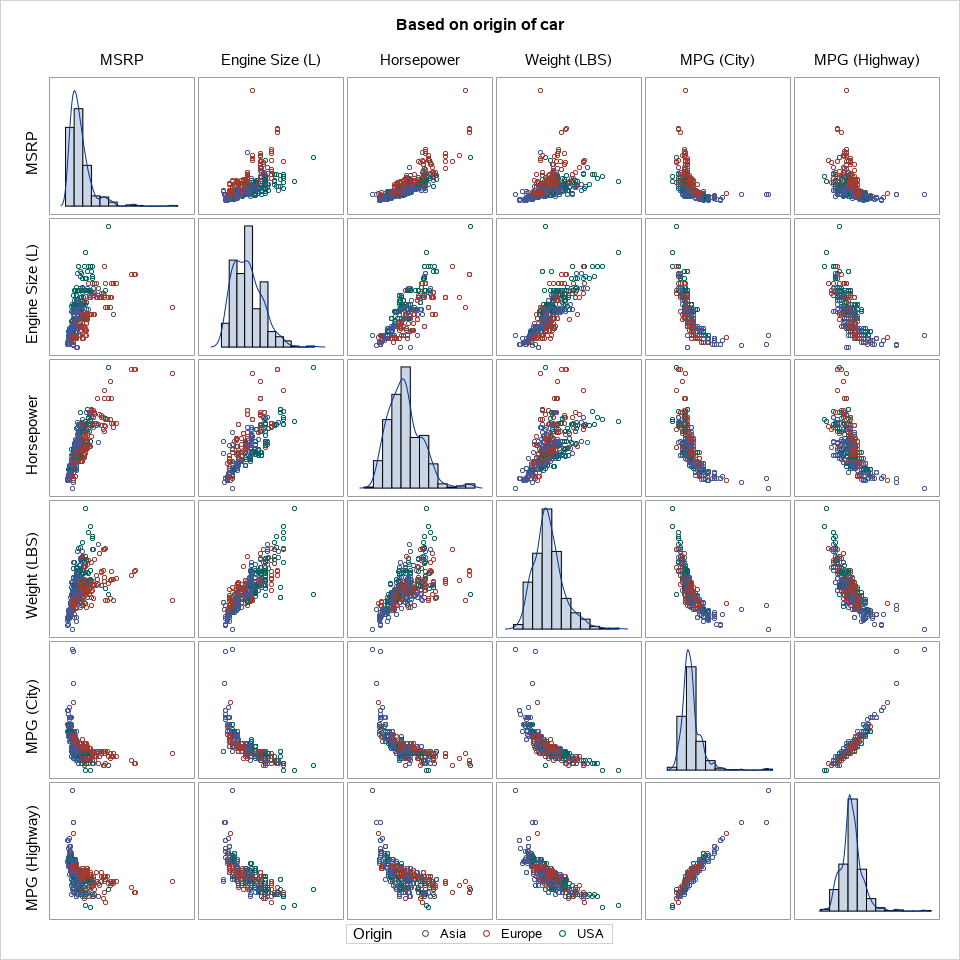

In [9]:
sas.submitLST("""
proc sgscatter data=sashelp.cars; 
matrix msrp enginesize horsepower weight mpg_city mpg_highway /group=origin diagonal=(histogram kernel);
ods graphics on / width=10in height=10in;
 title 'Based on origin of car';
run;
""")

Observing the above scatter plot matrix can provide a lot of insights into the dataset.

For example, some of the postive and negative correlations can be observed among all cars across different origins. For example, MPG (City) and MPG (Highway) are postive and almost linearly correlated. Engine Size are positively correlated with Horsepower and Weight in general. On the other hand, some negative, although nonlinear, correlations can be observed between MPG (city or highway) and Engine Size or Horsepower or Weight.

It can also be seen from the scatter plot of Engine Size vs MSRP that the Cars in USA with a larger engine size have a relatively lower price in comparison to the cars manufactured in europe. 

The cars manufactured in europe are costlier in comparison to cars manufactured in USA and Asia.

### **Question: Create a scatter plot matrix for all the predictors in the code above and group the observations based on their drive train. Comment on what you observe based on the scatter plot matrix.**


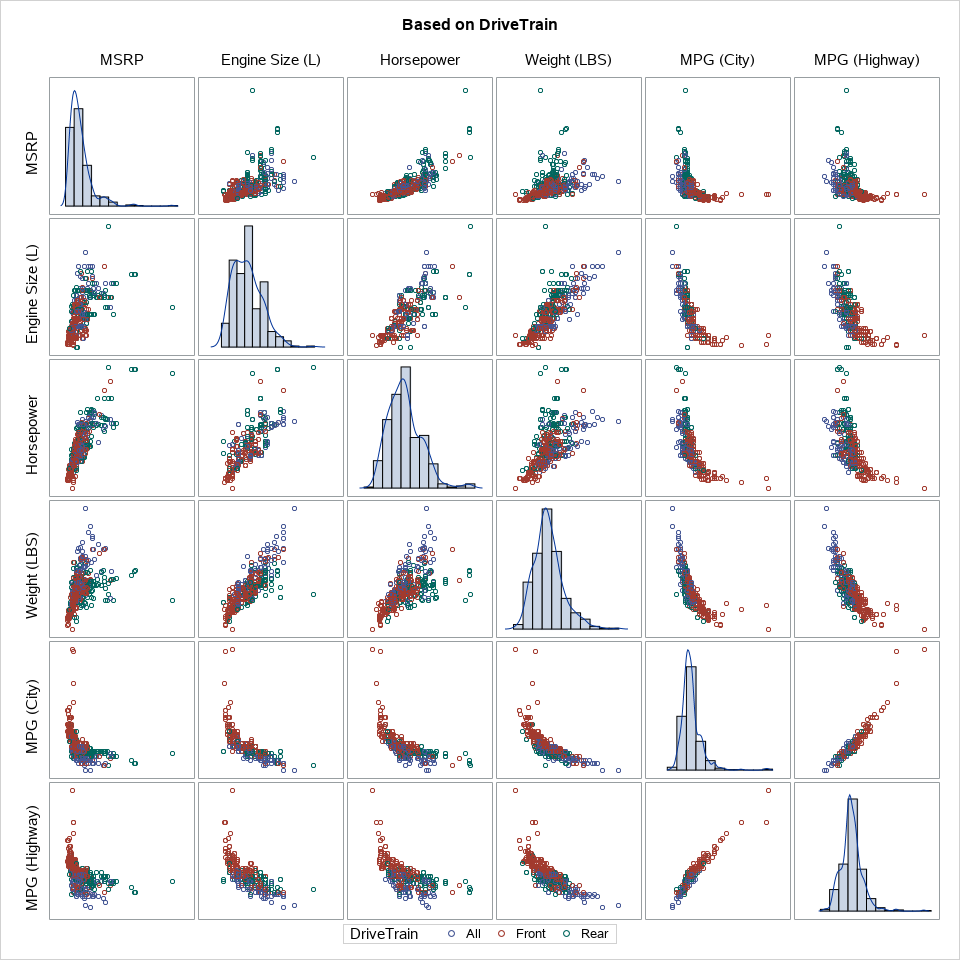

In [28]:
######################################################
sas.submitLST("""
proc sgscatter data=sashelp.cars; 
matrix msrp enginesize horsepower weight mpg_city mpg_highway /group=DriveTrain diagonal=(histogram kernel);
ods graphics on / width=10in height=10in;
 title 'Based on DriveTrain';
run;
""")
            # Enter your code in here #

######################################################

######################################################

                # Type your answers in here #

###################################################### 

### **Question: Create a scatter plot matrix for all the predictors in the code above and group the observations based on the car type. Comment on what you observe based on the scatter plot matrix.**


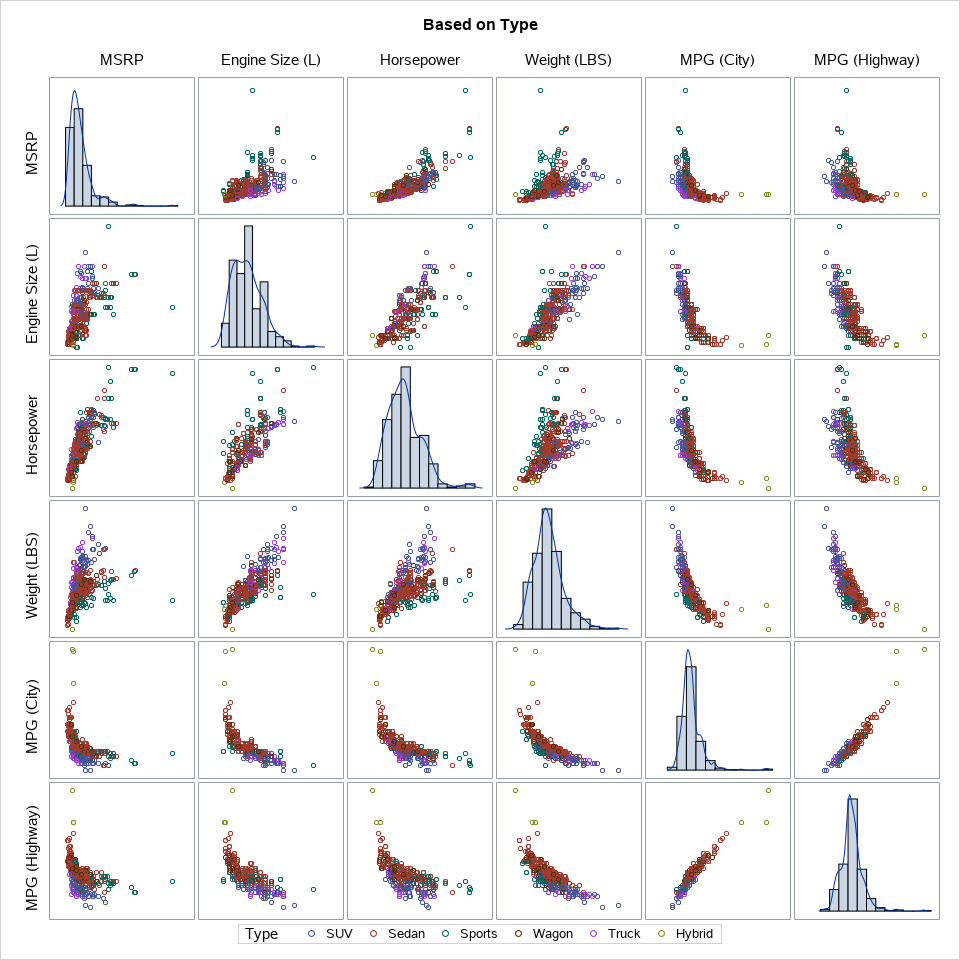

In [29]:
######################################################
sas.submitLST("""
proc sgscatter data=sashelp.cars; 
matrix msrp enginesize horsepower weight mpg_city mpg_highway /group=Type diagonal=(histogram kernel);
ods graphics on / width=10in height=10in;
 title 'Based on Type';
run;
""")

######################################################

######################################################

                # Type your answers in here #

###################################################### 

## Grouped Box plot 

The box plot below shows the important aspects of data grouped using different categories.


More information on PROC SGPANEL: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=grstatproc&docsetTarget=p121sy0a2jycdfn13zygo90opvra.htm&locale=en



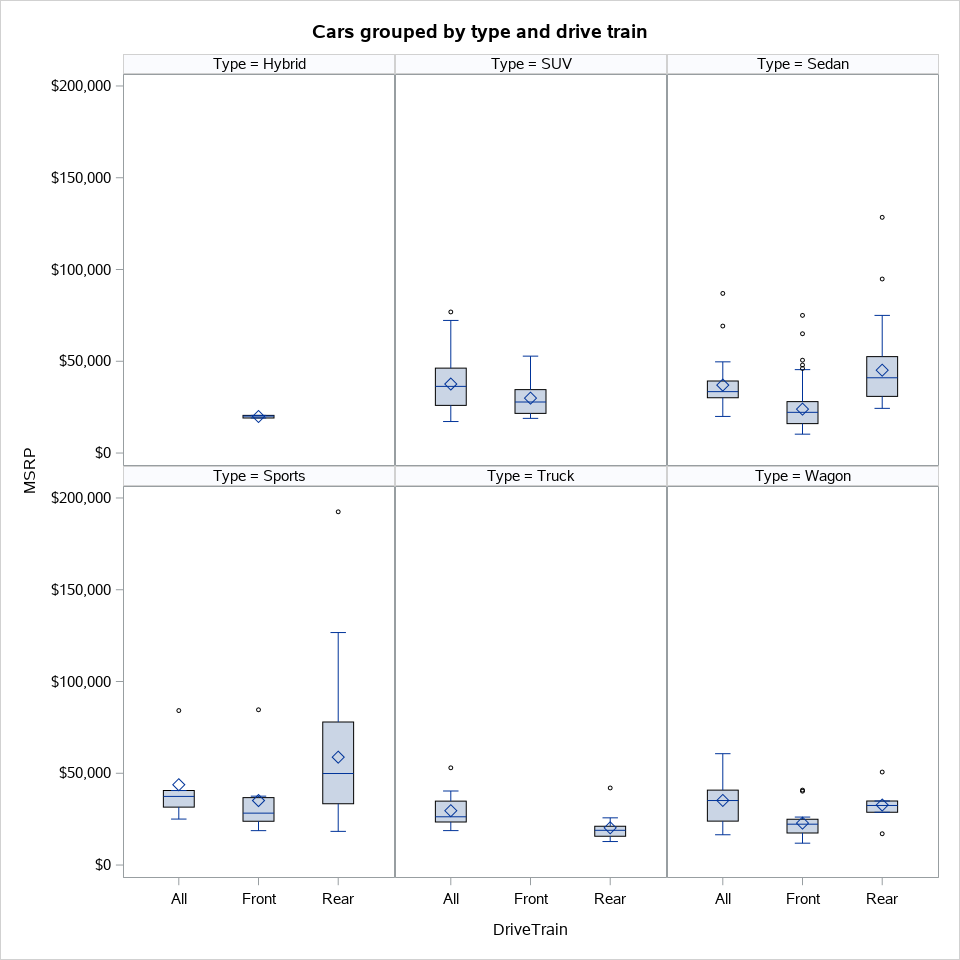

In [13]:
sas.submitLST("""

proc sgpanel data=sashelp.cars;
panelby type / rows=2 columns=3;
vbox msrp / category= drivetrain;
title 'Cars grouped by type and drive train';
run;

""")

It can be observed that all hybrid cars are only front wheel drives. Also, no trucks are front wheel drives and all SUV's are either all wheel drive or front wheel drives.

Also, the box plots are plotted in terms of MSRP for each of the categories sub grouped for their drive tains. It can be seen that rear wheel drive sports are are in general more expensive than front wheel drive or all wheel drive sports cars.

### **Question: Create a box plot where cars are grouped based on their type and origin**

**a) Cars from which origin are relatively costlier?** \
**b) As per the dataset (collected in 2004) whcih is the only region that manufactured hybrid cars?**



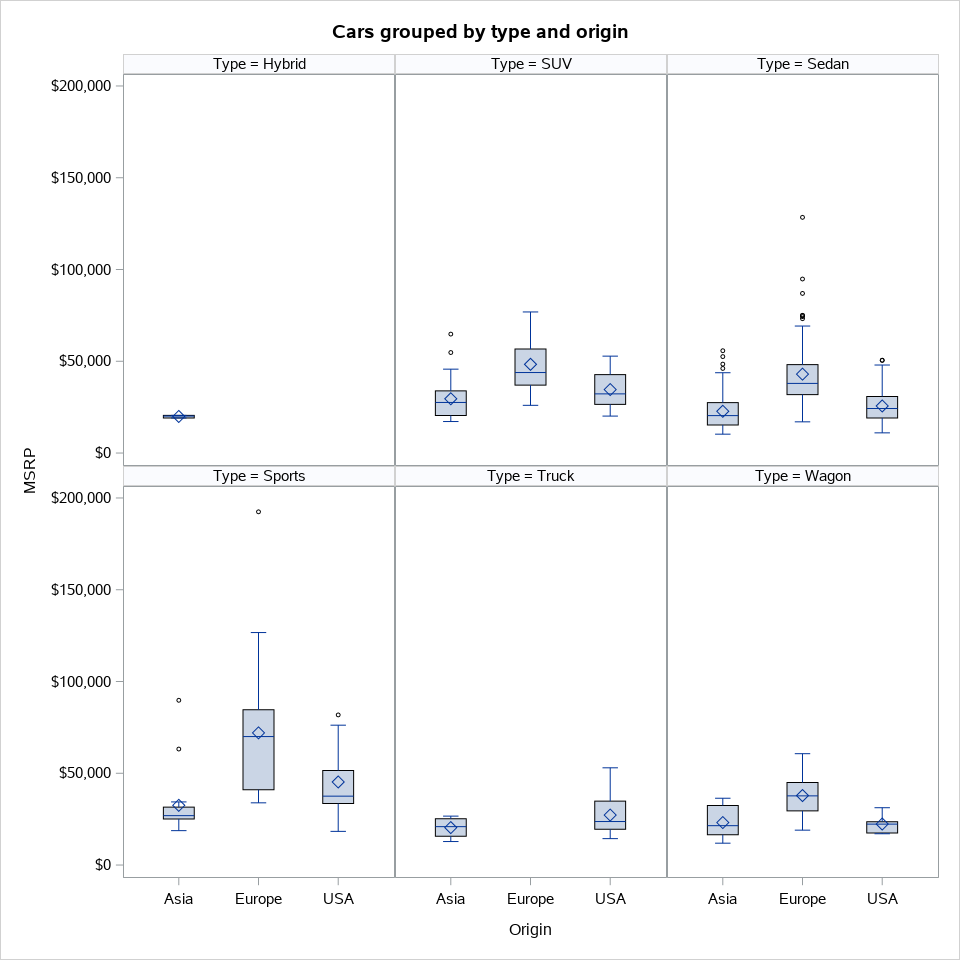

In [31]:
######################################################
sas.submitLST("""

proc sgpanel data=sashelp.cars;
panelby type / rows=2 columns=3;
vbox msrp / category= origin;
title 'Cars grouped by type and origin';
run;

""")
######################################################

######################################################

                # Type your answers in here #

###################################################### 

## Variable transformation

We can transform the categorical variables into discrete numbers like 0,1 and 2.

In [15]:
sas.submitLST("""
data h1a;
set sashelp.cars;
if origin = 'Asia' then origin_bin = 0;if origin = 'Europe' then origin_bin = 1; if origin = 'USA' then origin_bin = 2;
if drivetrain = 'All' then drive_bin = 0;if drivetrain= 'Front' then drive_bin = 1; if drivetrain= 'Rear' then drive_bin = 2;
proc print data = h1a (obs=10);
title 'Dummy variables added';
run;

""")

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_bin,drive_bin
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,0,0
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,0,1
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,0,1
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,0,1
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,0,1
6,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,"$46,100","$41,100",3.5,6,225,18,24,3893,115,197,0,1
7,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,"$89,765","$79,978",3.2,6,290,17,24,3153,100,174,0,2
8,Audi,A4 1.8T 4dr,Sedan,Europe,Front,"$25,940","$23,508",1.8,4,170,22,31,3252,104,179,1,1
9,Audi,A41.8T convertible 2dr,Sedan,Europe,Front,"$35,940","$32,506",1.8,4,170,23,30,3638,105,180,1,1
10,Audi,A4 3.0 4dr,Sedan,Europe,Front,"$31,840","$28,846",3.0,6,220,20,28,3462,104,179,1,1


## Correlation plot

The correlation plot is an important tool to examine the relationship between different variables.

The CORR procedure computes Pearson correlation coefficients, three nonparametric measures of association, polyserial correlation coefficients, and the probabilities associated with these statistics.

By default, Pearson correlation statistics are computed from observations with nonmissing values for each pair of analysis variables.

When the relationship between two variables is nonlinear or when outliers are present, the correlation coefficient might incorrectly estimate the strength of the relationship. Plotting the data enables you to verify the linear relationship and to identify the potential outliers.

More information on PROC CORR: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.5&docsetId=procstat&docsetTarget=procstat_corr_syntax01.htm&locale=en



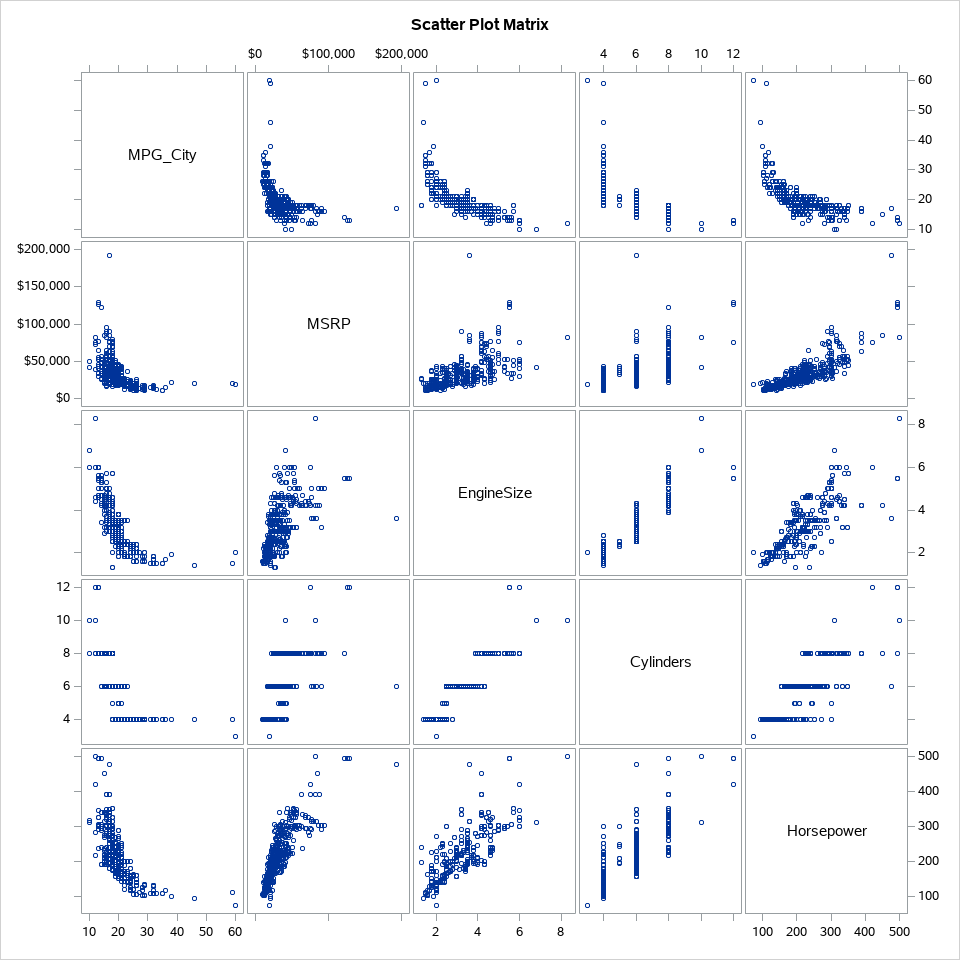

In [16]:
sas.submitLST("""
ods graphics on;
title 'Correlation analysis';
proc corr data=h1a PLOTS(MAXPOINTS=30000)=matrix;
var  MPG_City MSRP EngineSize Cylinders Horsepower  MPG_Highway Weight Wheelbase Length origin_bin drive_bin;
run;
""")

Based on the Pearson correlation coefficients above, it can be seen that MPG_city is strongly correlated with MPG_highway, which is expected as they generally positively correlated with each other. This is a case of collinearity. 

However, if we were to predict the mileage of a car based on the information we have we would want to look into a couple of important variables such as weight, horsepower, engine size, cylinders etc.

It can be seen that the horsepower, cylinders, engine and weight in general have negative correlations with the MPG of the car. That means, as these parameters increase the MPG of the car is supposed to decrease. 

###The REG procedure is one of many regression procedures in the SAS System. It is a general-purpose procedure for regression, while other SAS regression procedures provide more specialized applications.

Nine model-selection methods are available in PROC REG. In the simplest method, PROC REG fits the complete model that you specify. The other eight methods involve various ways of including or excluding variables from the model.

###One Simple Linear Regression Example

Suppose that a response variable $Y$ can be predicted by a linear function of a regressor variable $X$. You can estimate $\beta_0$, the intercept, and $\beta_1$, the slope, in

$Y_i=\beta_0+\beta_1X_i+\epsilon_i$

for the observations $i=1,2,\cdots,n$. Fitting this model with the REG procedure requires only the following MODEL statement, where y is the outcome variable and x is the regressor variable.

proc reg;
   model y=x;
run;

For example, you might use regression analysis to find out how well you can predict a child’s weight if you know that child’s height. The equation of interest is

$Weight=\beta_0+\beta_1Height+\epsilon$

The variable $Weight$ is the response or dependent variable in this equation, and $\beta_0$ and $\beta_1$ are the unknown parameters to be estimated. The variable Height is the regressor or independent variable, and $\epsilon$ is the unknown error. The following commands invoke the REG procedure and fit this model to the data.

ods graphics on;
proc reg data=sashelp.class;
   model Weight = Height;
run;

More information on PROC REG: https://documentation.sas.com/?cdcId=pgmsascdc&cdcVersion=9.4_3.4&docsetId=statug&docsetTarget=statug_reg_syntax01.htm&locale=en

#### We will now try to predict the mileage of the car in city based on these important variables.


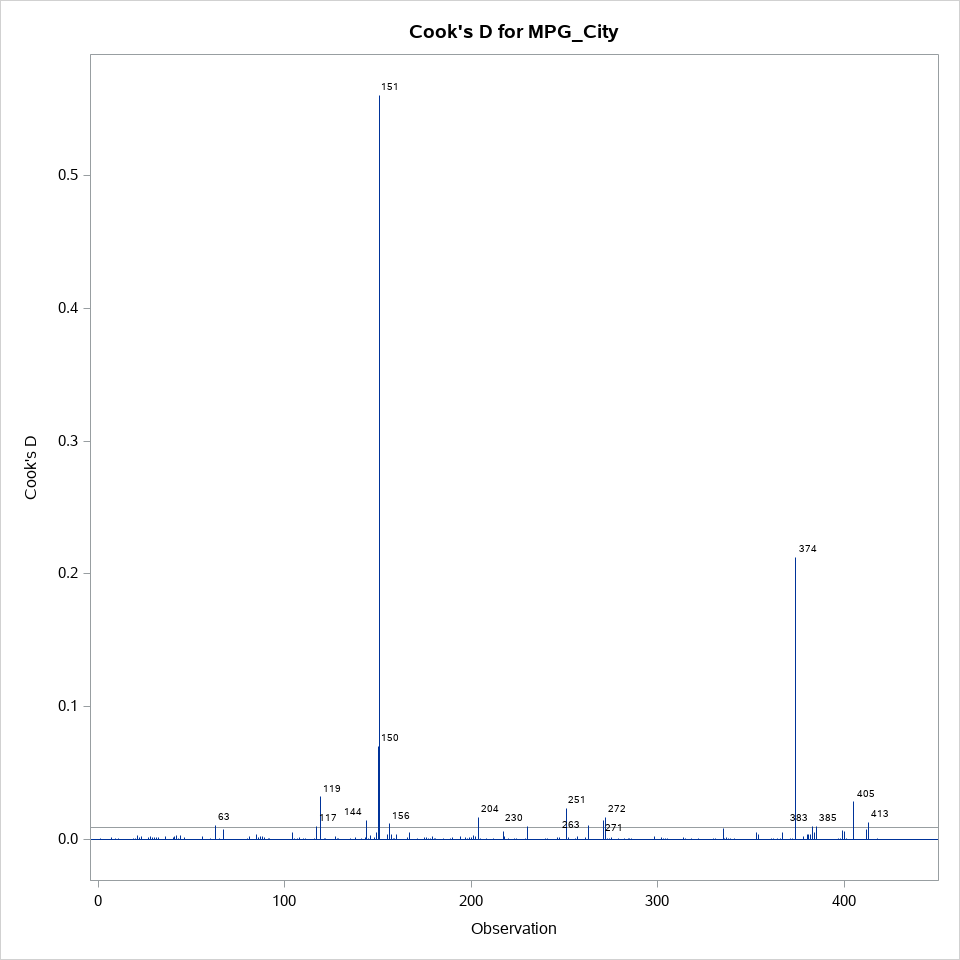
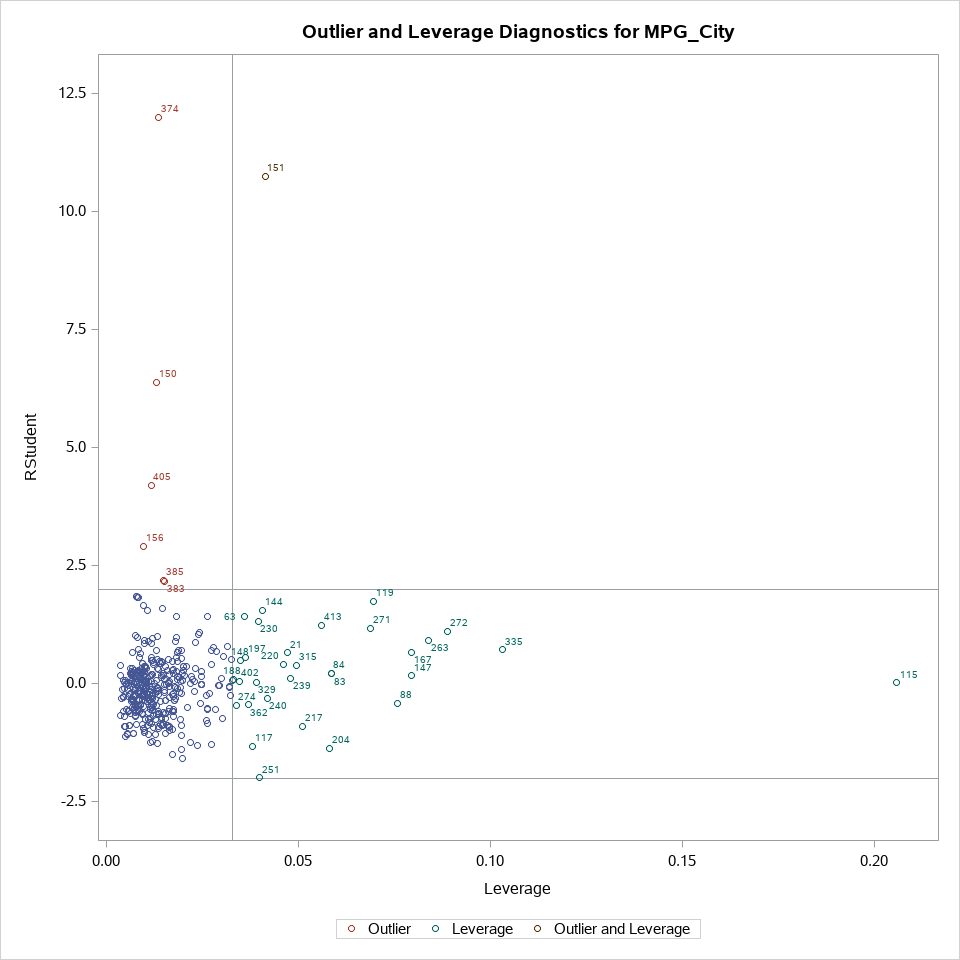

In [33]:

sas.submitLST("""
title 'Regression analysis for mileage';
proc reg data=h1a
         plots(only label)=(RStudentByLeverage CooksD);
   model mpg_city = enginesize weight cylinders horsepower wheelbase length;
run;
""")

AS seen in the figure above, observation  115, 151 and 374 are extremes that can affect the model to a significant extent. So we will retrain our linear regression model after removing these 3 observations and see the difference.


First lets add id to the dataset to remove observations

In [18]:

sas.submitLST("""
data h2a;
set h1a;
id = _N_;  
proc print data=h2a (obs=5);
title 'Addition of id';
run ;
""")






Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_bin,drive_bin,id
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,0,0,1
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,0,1,2
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,0,1,3
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,0,1,4
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,0,1,5


### **Question : Remove data points 115,151 and 374. Name the new dataset as "new". Print the new dataset and just display the first 10 observations.**

In [19]:
######################################################

            # Enter your code in here #

######################################################

### **Question : Perform regression analysis after removing the outliers on the new dataset. Creat all the important plots. Use the same predictors as the section above and comment on your results**

**a) Do you see any imporvement?** \
**b) Report the new adjusted R^2 and R^2**

In [20]:
######################################################

            # Enter your code in here #

######################################################

######################################################

                # Type your answers in here #

###################################################### 

## Model selection
Feature selection to select the best model using Sequential feature selection. This way, one can select different models and find the best fit based on features.

In [34]:
sas.submitLST("""
ods graphics on;

proc glmselect data=new plot=CriterionPanel;
   model mpg_city = enginesize weight cylinders horsepower wheelbase length
                / selection=stepwise(select=SL choose=PRESS);;
title 'Stepwise feature selection to build the best model';
run;
""")

/usr/local/lib/python3.7/dist-packages/saspy/sasioiom.py:987: UserWarning: Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem
  warnings.warn("Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem")


Now let's see if taking the logarithmic transform of the mileage variable helps.

In [22]:
sas.submitLST("""
data new2;
set h2a;
mpg_log=log(mpg_city);
proc print data = new2 (obs=5);
title 'Logarithmic transform of MPG_city';
run;

""")

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length,origin_bin,drive_bin,id,mpg_log
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189,0,0,1,2.83321
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172,0,1,2,3.17805
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183,0,1,3,3.09104
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186,0,1,4,2.99573
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197,0,1,5,2.89037



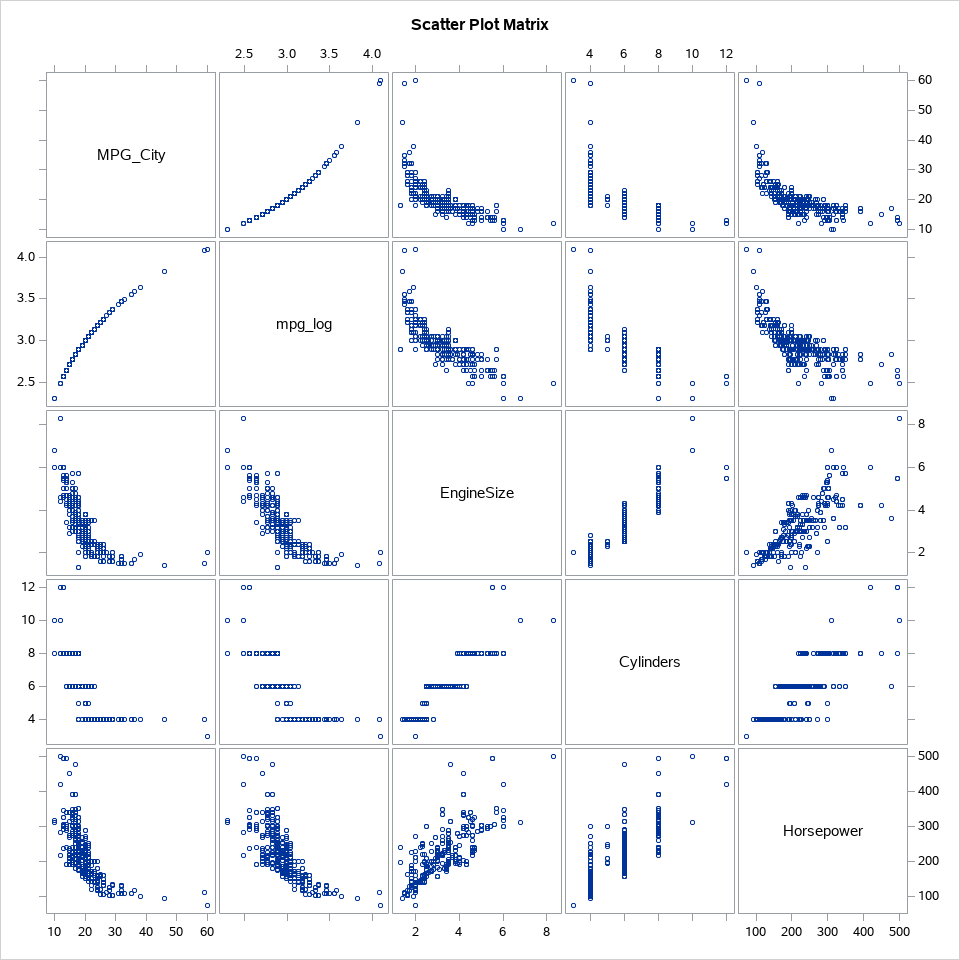

In [23]:
sas.submitLST("""
ods graphics on;
title 'Correlation analysis';
proc corr data=new2 PLOTS(MAXPOINTS=30000)=matrix;
var mpg_city mpg_log enginesize cylinders horsepower weight;
title 'Correlation analysis MPG vs MPG_log';
run;
""")

As seen in the correlation coefficient table above, the correlation improves with the log transformation of mileage_city.

/usr/local/lib/python3.7/dist-packages/saspy/sasioiom.py:987: UserWarning: Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem
  warnings.warn("Noticed 'ERROR:' in LOG, you ought to take a look and see if there was a problem")



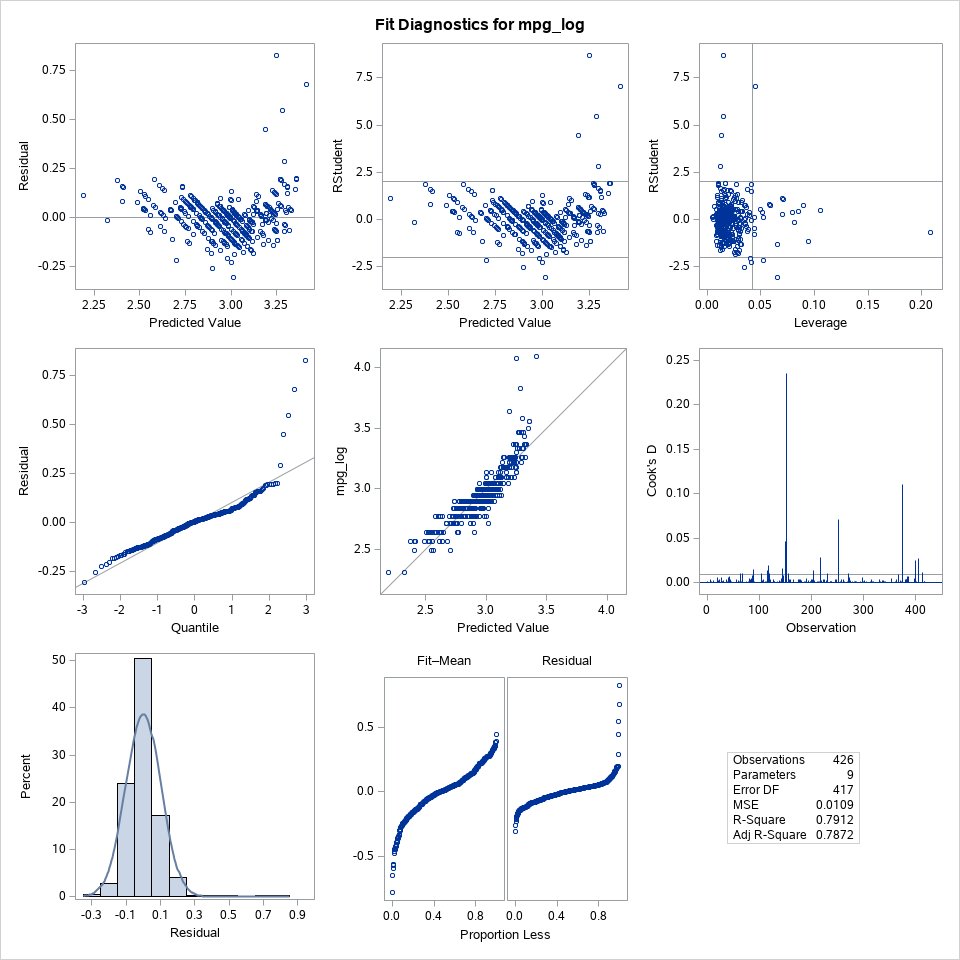
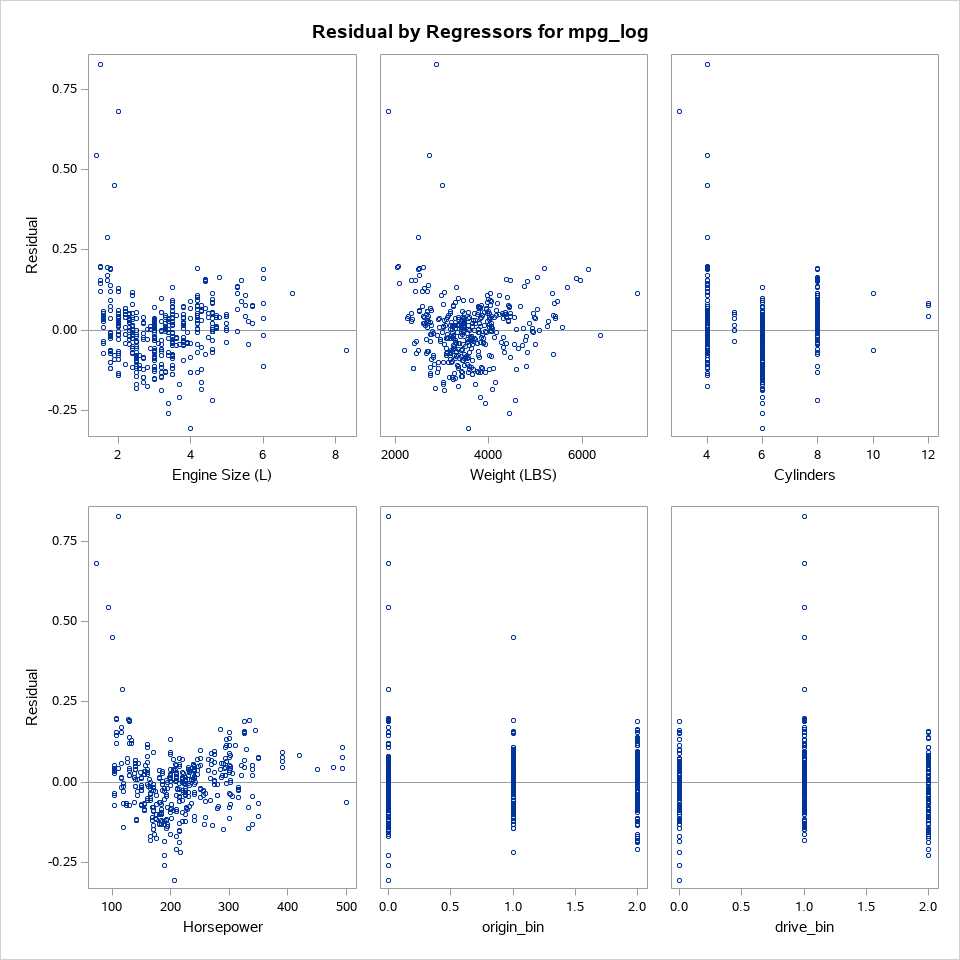
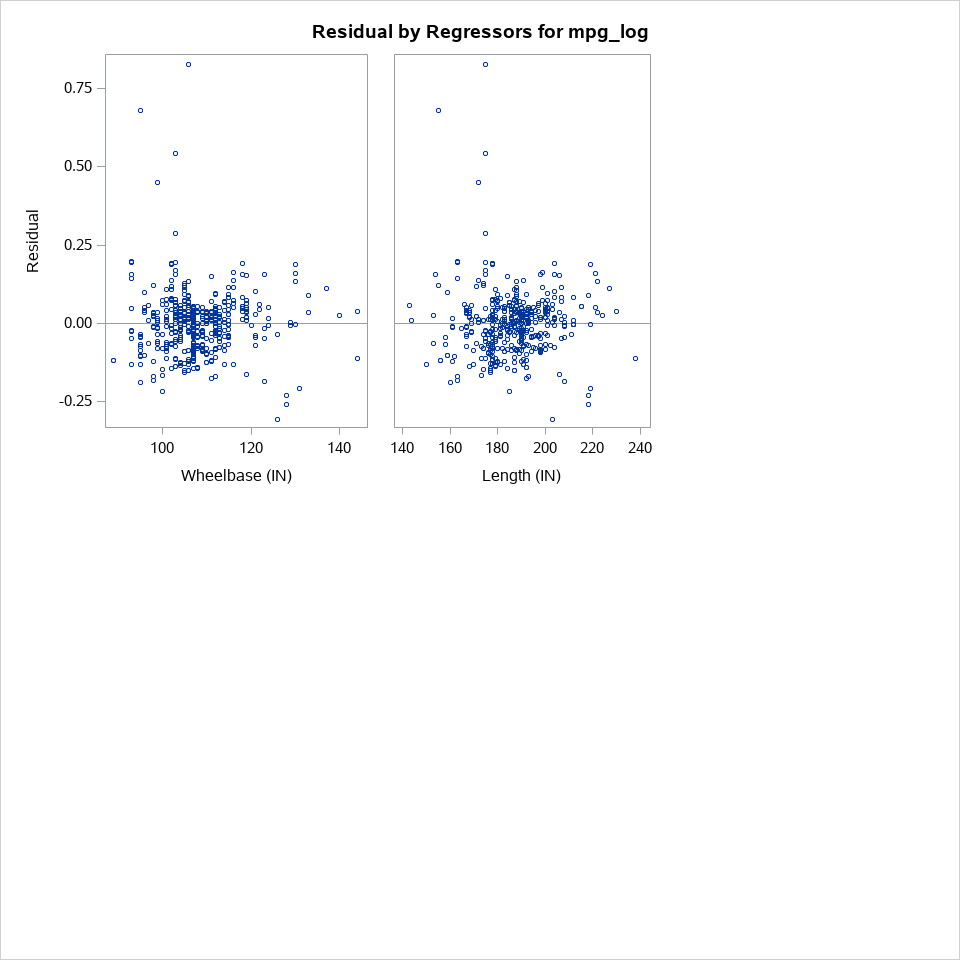

In [24]:
sas.submitLST("""

proc reg data=new2;
  model make ;

   model mpg_log = enginesize weight cylinders horsepower origin_bin drive_bin wheelbase length;
title 'Regression analysis based on log transform of mpg_city';
run;
""")

Data Set,WORK.NEW2
Dependent Variable,mpg_log
Selection Method,Stepwise
Select Criterion,Significance Level
Stop Criterion,Significance Level
Choose Criterion,PRESS
Entry Significance Level (SLE),0.15
Stay Significance Level (SLS),0.15
Effect Hierarchy Enforced,None
Number of Observations Read,428
Number of Observations Used,426

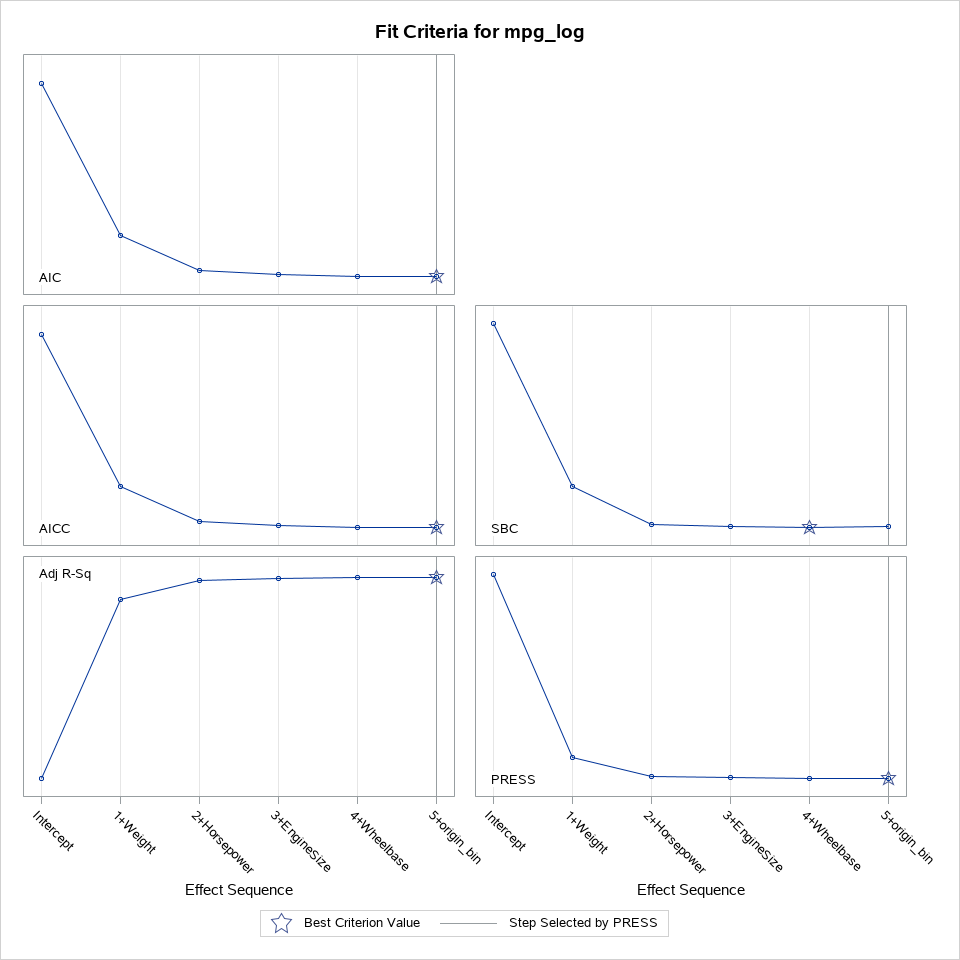

In [25]:
sas.submitLST("""
ods graphics on;

proc glmselect data=new2 plot=CriterionPanel;
   model mpg_log = enginesize weight cylinders horsepower origin_bin drive_bin wheelbase length
                / selection=stepwise(select=SL choose=PRESS);;
                title 'STEPWISE FEATURE SELECTION';
run;
""")